In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as ran
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC


In [4]:
data = pd.read_csv('OJ.csv')
data

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


In [106]:
def recta(x,m=-7/3,b=0.8):
    return x*m+b

def recta2(x1,x2,b0,b1,b2):
    return b0 + b1*x1+b2*x2
    



def model(x1,x2,b0,b1,b2):
    return b0 + b1*x1+b2*x2

def loglikelihood(x1_obs, x2_obs, y_obs, b0,b1,b2):
    d = y_obs -  model(x1_obs,x2_obs,b0,b1,b2)
    d = d/y_obs.std()
    d = -0.5 * np.sum(d**2)
    return d

def logprior(b0,b1,b2):
    p = -np.inf
    if b0 >-1.0 and b0<1.0 and b1 >-1.0 and b1<1.0 and b2 >-1.0 and b2<1.0 :
        p = 0.0
    return p



X=data['LoyalCH']
Y=data['PriceDiff']
Z=data['Purchase']
Z[Z == 'CH'] = 1
Z[Z == 'MM'] = -1
ii = (Z==1)
#x =  np.linspace(np.min(X),np.max(X), 100)
x =  np.linspace(0,1, 100)
#y =  np.linspace(np.min(Y),np.max(Y), 100)
y =  np.linspace(0,1, 100)

def MC(sigmas,N = 500):
    
    lista_b0 = [ran.random()*2-1]
    lista_b1 = [ran.random()*2-1]
    lista_b2 = [ran.random()*2-1]
    logposterior = [loglikelihood(X,Y, Z, lista_b0[0], lista_b1[0], lista_b2[0]) 
                    + logprior(lista_b0[0], lista_b1[0], lista_b2[0])]
    
    

    for i in range(1,N):
        pb0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigmas[0])
        pb1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigmas[1])
        pb2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigmas[2])

        
        logposterior_viejo = loglikelihood(X,Y,Z, lista_b0[i-1], lista_b1[i-1], lista_b2[i-1]) + logprior(lista_b0[i-1], lista_b1[i-1], lista_b2[i-1])
        logposterior_nuevo = loglikelihood(X,Y,Z, pb0, pb1, pb2) + logprior(pb0, pb1, pb2)
        
        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            lista_b0.append(pb0)
            lista_b1.append(pb1)
            lista_b2.append(pb2)
            logposterior.append(logposterior_nuevo)
        else:
            lista_b0.append(lista_b0[i-1])
            lista_b1.append(lista_b1[i-1])
            lista_b2.append(lista_b2[i-1])
            logposterior.append(logposterior_viejo)
    lista_b0 = np.array(lista_b0)
    lista_b1 = np.array(lista_b1)
    lista_b2 = np.array(lista_b2)
    logposterior = np.array(logposterior)
    return np.median(lista_b0), np.median(lista_b1), np.median(lista_b2)
valores = MC([1,1,1])
print(valores)

/home/clarkguilty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clarkguilty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(-0.4367437463730669, 0.7687708506135803, 0.6858964975039129)


In [ ]:
def model(x1,b0,b1):
    return x1*b1+b0

def loglikelihood(x1_obs, x2_obs, y_obs, b0,b1,b2):
    d = y_obs -  model(x1_obs,x2_obs,b0,b1,b2)
    d = d/y_obs.std()
    d = -0.5 * np.sum(d**2)
    return d

#Encontrar forma de encontrar directamente la recta, no la del hiperplano.

def logprior(b0,b1,b2):
    p = -np.inf
    if b0 >-1.0 and b0<1.0 and b1 >-1.0 and b1<1.0 and b2 >-1.0 and b2<1.0 :
        p = 0.0
    return p

def MC2(sigmas,N = 500):
    
    lista_b0 = [ran.random()*2-1]
    lista_b1 = [ran.random()*2-1]
    lista_b2 = [ran.random()*2-1]
    logposterior = [loglikelihood(X,Y, Z, lista_b0[0], lista_b1[0], lista_b2[0]) 
                    + logprior(lista_b0[0], lista_b1[0], lista_b2[0])]
    
    

    for i in range(1,N):
        pb0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigmas[0])
        pb1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigmas[1])
        pb2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigmas[2])

        
        logposterior_viejo = loglikelihood(X,Y,Z, lista_b0[i-1], lista_b1[i-1], lista_b2[i-1]) + logprior(lista_b0[i-1], lista_b1[i-1], lista_b2[i-1])
        logposterior_nuevo = loglikelihood(X,Y,Z, pb0, pb1, pb2) + logprior(pb0, pb1, pb2)
        
        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            lista_b0.append(pb0)
            lista_b1.append(pb1)
            lista_b2.append(pb2)
            logposterior.append(logposterior_nuevo)
        else:
            lista_b0.append(lista_b0[i-1])
            lista_b1.append(lista_b1[i-1])
            lista_b2.append(lista_b2[i-1])
            logposterior.append(logposterior_viejo)
    lista_b0 = np.array(lista_b0)
    lista_b1 = np.array(lista_b1)
    lista_b2 = np.array(lista_b2)
    logposterior = np.array(logposterior)
    return np.median(lista_b0), np.median(lista_b1), np.median(lista_b2)

In [ ]:
LinearSVC

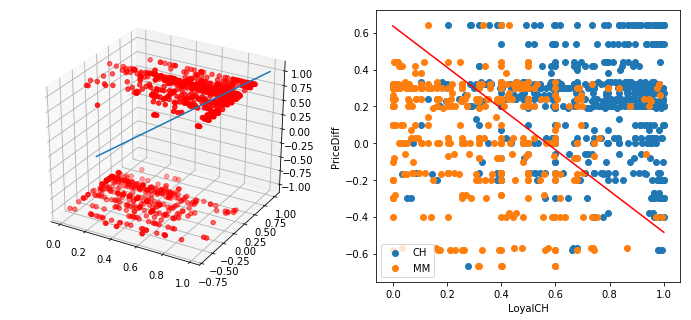

In [108]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121, projection='3d')

ax.scatter(X,Y,Z, c='r', marker='o')
ax.plot3D(x,y,model(b0=valores[0], b1=valores[1], b2=valores[2], x1=x, x2=y))

jj = (Z > valores[0]+valores[1]*X+valores[2]*Y)

fig.add_subplot(122)


plt.scatter(X[ii],Y[ii], label='CH')
plt.scatter(X[~ii],Y[~ii],label = 'MM')
#plt.plot(x,recta(x))
plt.plot(x,recta(x,m=-valores[1]/valores[2],b=-valores[0]/valores[2]), color='r')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
#plt.xlim(-1,1)
#plt.ylim(-1,1)
plt.legend()



In [44]:
Y.std()

0.2715626871792703

In [57]:
total = 0
for i in range(1,250):
    rand = ran.random()*2-1
    total += rand
    print(i, rand, total/i)
    

1 0.14048071265436946 0.14048071265436946
2 -0.5224625824468001 -0.19099093489621533
3 -0.7643386884379966 -0.3821068527434757
4 0.48431661908330037 -0.1655009847867817
5 0.47815872440766216 -0.03676904294789294
6 -0.5469107518610621 -0.1217926611000878
7 -0.2032730873903943 -0.133432721998703
8 0.9173456166601397 -0.0020854296663476712
9 -0.3200929937870214 -0.03741960345753364
10 0.425984097962925 0.008920766684512227
11 0.05381012824404152 0.013001617735378527
12 0.06216030941415185 0.017098175375276303
13 -0.8224279235832099 -0.047480755313838025
14 0.5074078380922897 -0.007845855784828897
15 0.965357726939382 0.057034383063451835
16 0.732913872575917 0.0992768511579809
17 0.28245422951249277 0.11005199106118749
18 0.02376013242712216 0.10525799891485052
19 0.12328576428815774 0.10620682867134038
20 -0.8671415988486628 0.05753940729534022
21 -0.16911051782049036 0.0467465537183959
22 0.06607849479479566 0.047625278312777714
23 0.9518642454582231 0.0869400160147536
24 0.281732346522